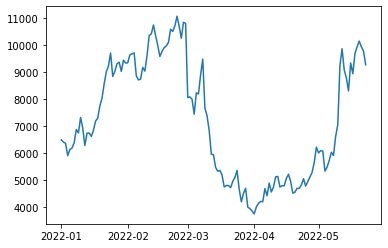

,close,open
date,,
2022-01-01,6483.174840,6799.607180
2022-01-02,6403.003385,6484.055707
2022-01-03,6357.252943,6406.138735
2022-01-04,5900.105561,6355.513136
2022-01-05,6128.509168,5899.344832
...,...,...
2022-05-19,9927.707924,9681.500337
2022-05-20,10139.239583,9917.965325
2022-05-21,9927.532030,10146.285615


In [14]:
import matplotlib.pyplot as plt

# Mathtext demo

import requests
import pandas as pd
import numpy as np
def get_crypto_price(symbol, start, end):
    api_url = f'https://data.messari.io/api/v1/markets/binance-{symbol}-usdt/metrics/price/time-series?start={start}&end={end}&interval=1d'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['data']['values'])
    df = df.rename(columns = {0:'date',1:'open',2:'high',3:'low',4:'close',5:'volume'})
    df['date'] = pd.to_datetime(df['date'], unit = 'ms')
    df = df.set_index('date')
    return df
start='2022-01-01'
end='2022-05-23'
one = get_crypto_price('BTC', start, end)
two = get_crypto_price('RUNE', start, end)
df = pd.DataFrame()
#print(np.array([one.index]))
#ratio['close']=one.close/two.close
df['close']=(one.close/two.close)
df['open']=(one.open/two.open)
#c=c[0]
fig, ax = plt.subplots()
ax.plot(df.close)
plt.show()
df